In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
image_path = r"C:\Users\shash\Downloads\Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

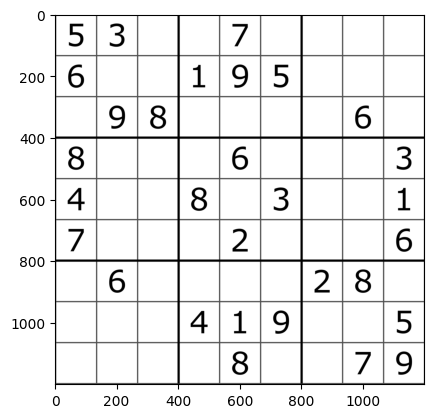

In [127]:
plt.imshow(image, cmap='gray')

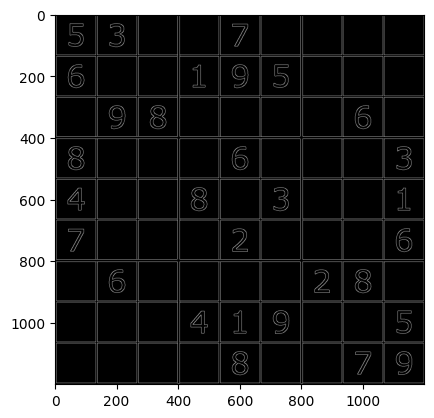

In [128]:
img = cv2.Canny(image, 50, 200, None, 3)
plt.imshow(img, cmap='gray')

In [1]:
def auto_detection(image, sigma=0.33): # sigma = 0.33 as the image is divided in 3 ranges - below min threshold, above max threshold and the range to be considered for detection. hence sgma =0.33 as it signifies 33% roughly equal to 100/3
    img_median = np.median(image)
    lower_thresh = int(max(0, (1.0 - sigma)*img_median))
    upper_thresh = int(min(255, (1.0 + sigma)*img_median))
    return cv2.Canny(image, lower_thresh, upper_thresh)

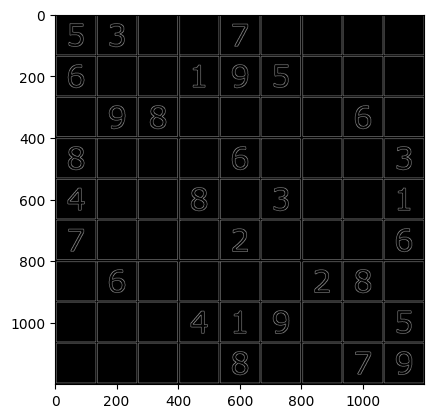

In [6]:
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (5,5), 0)
canny = auto_detection(blurred)
plt.imshow(canny, cmap='gray')

In [7]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 150, None, 0, 0)

In [9]:
len(lines)

36

803 0 803 2
404 2 404 0
4 0 137 0
531 0 664 0
930 0 4 2
137 2 531 2
664 2 132 0
265 0 270 0
1063 0 132 2
270 2 930 2
1063 2 1196 2
536 0 1196 0
265 2 536 2
397 2 397 0
796 0 796 2
1067 0 1067 2
934 0 934 2
668 0 668 2


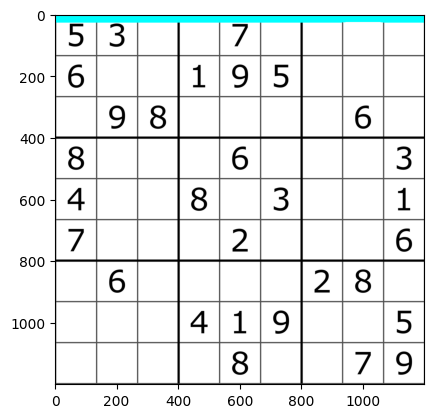

In [31]:
i = cv2.imread(image_path)
for n in range(0,len(lines), 2):
    x1, y1 = lines[n][0]
    x2, y2 = lines[n+1][0]
    x1, y1, x2, y2 = round(x1), round(y1) ,round(x2), round(y2)
    print(x1,y1, x2,y2)
    cv2.line(i, (x1,y1), (x2,y2), (0,255,255), 50)
plt.imshow(i)